This is the notebook for final visualization for the three dependent variables defined in the regression notebook.

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns; sns.set()
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv('data/ct_df.csv')

In [3]:
df.head()

,SENIOR,S_PED,S_NOT_PED,S_PED_DEAD,S_SURVIVED,S_DEAD,S_DRINKING+,S_DRINKING-,S_MALE,S_FEMALE,...,AFTERNOON,NIGHT,MIDNIGHT,MONTH_1,MONTH_2,MONTH_3,rounds_1.0,rounds_2.0,rounds_3.0,YEAR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2001
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2001
2,3.0,1.0,2.0,1.0,0.0,3.0,0.0,1.0,3.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2001
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2001
4,2.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2001


In [4]:
sz = df[df['rounds_1.0'] == 1]

In [5]:
sz = sz.groupby(['YEAR']).sum()

In [6]:
sz.reset_index(inplace=True)

In [7]:
sz.YEAR.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017])

In [8]:
nsz = df[df['rounds_1.0'] == 0]

In [9]:
nsz = nsz.groupby(['YEAR']).sum()
nsz.reset_index(inplace=True)

In [10]:
df.shape

(15028, 61)

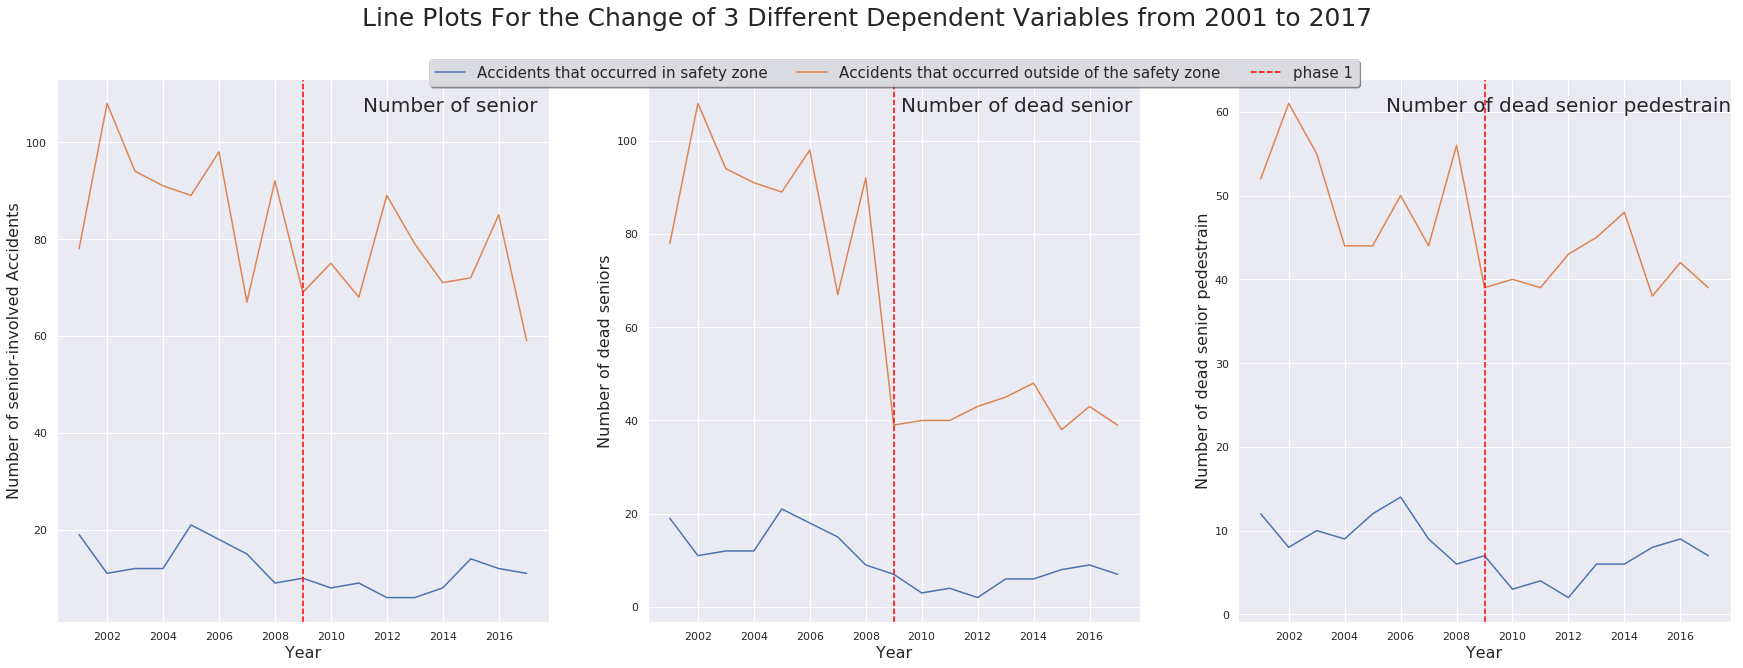

In [11]:
fig = plt.figure(figsize=(30, 10))
ax1= fig.add_subplot(131)
ax1 = sns.lineplot(x="YEAR", y="SENIOR", data=sz)
ax1 = sns.lineplot(x="YEAR", y="SENIOR", data=nsz)
text(0.8, 0.95, "Number of senior", ha='center', va='center', transform=ax1.transAxes,fontsize=20)
plt.axvline(x=2009, color="red",linestyle = "--")
ax1.set_ylabel(r'Number of senior-involved Accidents', fontsize = 16)
ax1.set_xlabel(r'Year', fontsize = 16)


ax3 = fig.add_subplot(133)
ax3 = sns.lineplot(x="YEAR", y="S_PED_DEAD", data=sz)
ax3 = sns.lineplot(x="YEAR", y="S_PED_DEAD", data=nsz)
plt.axvline(x=2009, color="red",linestyle = "--")
text(0.65, 0.95, "Number of dead senior pedestrain", ha='center', va='center', transform=ax3.transAxes,fontsize=20)
ax3.set_ylabel(r'Number of dead senior pedestrain', fontsize = 16)
ax3.set_xlabel(r'Year', fontsize = 16)

ax2 = fig.add_subplot(132)
ax2 = sns.lineplot(x="YEAR", y="S_DEAD", data=sz,label="Accidents that occurred in safety zone")
ax2 = sns.lineplot(x="YEAR", y="S_DEAD", data=nsz, label= "Accidents that occurred outside of the safety zone")
text(0.75, 0.95, "Number of dead senior", ha='center', va='center', transform=ax2.transAxes,fontsize=20)
plt.axvline(x=2009, color="red",linestyle = "--",label = "phase 1")
ax2.set_ylabel(r'Number of dead seniors', fontsize = 16)
ax2.set_xlabel(r'Year', fontsize = 16)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True,fontsize=15)


fig.suptitle('Line Plots For the Change of 3 Different Dependent Variables from 2001 to 2017',fontsize=25)



## Same plot as above but vertical for report

The plots below are the same as above but with some changes to the text and vertically aligned so they can be seen more easily in the report.

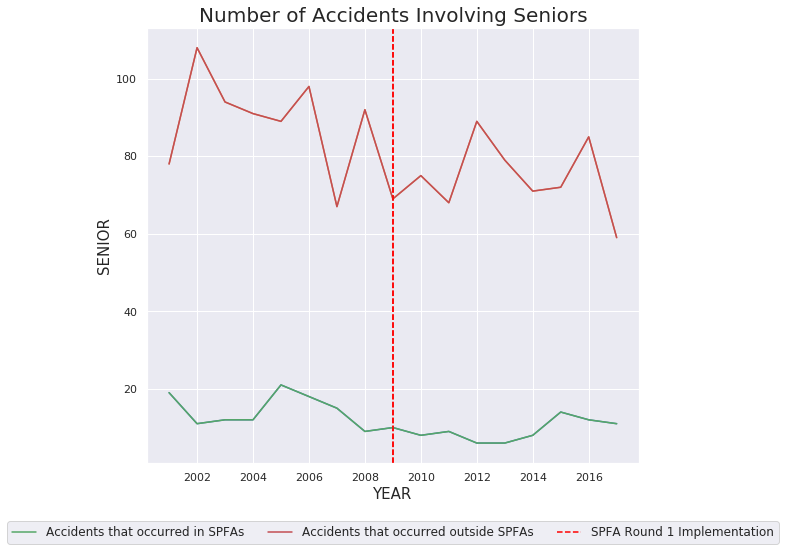

In [38]:
fig = plt.figure(figsize=(30, 8))
ax1= fig.add_subplot(131)
ax1 = sns.lineplot(x="YEAR", y="SENIOR", data=sz)
ax1 = sns.lineplot(x="YEAR", y="SENIOR", data=nsz)
plt.axvline(x=2009, color="red",linestyle = "--")
ax1.set_ylabel(r'Count', fontsize = 15)
ax1.set_xlabel(r'Year', fontsize = 15)
ax1.set_title("Number of Accidents Involving Seniors", fontsize = 20)
ax1 = sns.lineplot(x="YEAR", y="SENIOR", data=sz,label="Accidents that occurred in SPFAs")
ax1 = sns.lineplot(x="YEAR", y="SENIOR", data=nsz, label= "Accidents that occurred outside SPFAs")
plt.axvline(x=2009, color="red",linestyle = "--",label = "SPFA Round 1 Implementation")
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, fontsize=12)

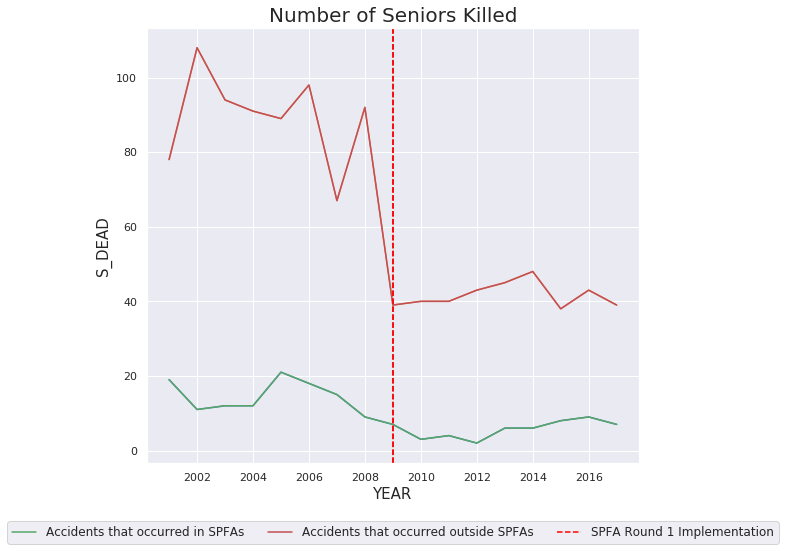

In [39]:
fig = plt.figure(figsize=(30, 8))
ax1 = fig.add_subplot(131)
ax1 = sns.lineplot(x="YEAR", y="S_DEAD", data=sz)
ax1 = sns.lineplot(x="YEAR", y="S_DEAD", data=nsz)
plt.axvline(x=2009, color="red",linestyle = "--")
ax1.set_ylabel(r'Count', fontsize = 15)
ax1.set_xlabel(r'Year', fontsize = 15)
ax1.set_title("Number of Seniors Killed", fontsize = 20)
ax1 = sns.lineplot(x="YEAR", y="S_DEAD", data=sz,label="Accidents that occurred in SPFAs")
ax1 = sns.lineplot(x="YEAR", y="S_DEAD", data=nsz, label= "Accidents that occurred outside SPFAs")
plt.axvline(x=2009, color="red",linestyle = "--",label = "SPFA Round 1 Implementation")
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, fontsize=12)

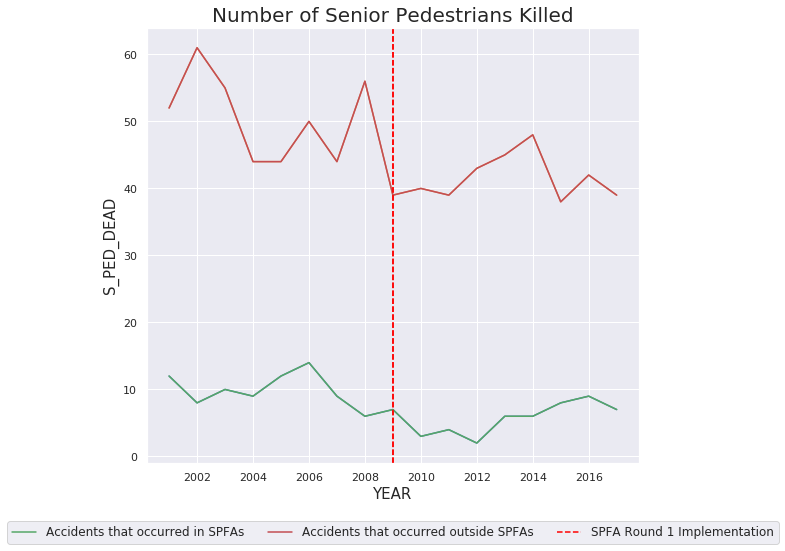

In [40]:
fig = plt.figure(figsize=(30, 8))
ax1 = fig.add_subplot(131)
ax1 = sns.lineplot(x="YEAR", y="S_PED_DEAD", data=sz)
ax1 = sns.lineplot(x="YEAR", y="S_PED_DEAD", data=nsz)
plt.axvline(x=2009, color="red",linestyle = "--")
ax1.set_ylabel(r'Count', fontsize = 15)
ax1.set_xlabel(r'Year', fontsize = 15)
ax1.set_title("Number of Senior Pedestrians Killed", fontsize = 20)
ax1 = sns.lineplot(x="YEAR", y="S_PED_DEAD", data=sz,label="Accidents that occurred in SPFAs")
ax1 = sns.lineplot(x="YEAR", y="S_PED_DEAD", data=nsz, label= "Accidents that occurred outside SPFAs")
plt.axvline(x=2009, color="red",linestyle = "--",label = "SPFA Round 1 Implementation")
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, fontsize=12)